In [36]:
# There is no need to import the random module ... 
# if we import the NumPy module, as it's redundant.

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# some random generating functions
# randint(-90,90)
# random() between 0 and 1.0
# randrange (-90, 90, step = 1)
# uniform (-90, 90) returns a floating-point decimal number

In [3]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
city_weather.text #sentence

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":79.84,"feels_like":79.84,"temp_min":76.01,"temp_max":83.37,"pressure":1017,"humidity":63},"visibility":10000,"wind":{"speed":3,"deg":65,"gust":5.01},"clouds":{"all":8},"dt":1661435822,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1661421730,"sunset":1661470255},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 79.84,
  'feels_like': 79.84,
  'temp_min': 76.01,
  'temp_max': 83.37,
  'pressure': 1017,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 65, 'gust': 5.01},
 'clouds': {'all': 8},
 'dt': 1661435822,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1661421730,
  'sunset': 1661470255},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
boston_data["sys"]["country"]

'US'

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 83.37 63 8 3


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | inhambane
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vao
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | sumbawanga
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | buta
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | akhisar
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | fairbanks
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | flinders
Processing Record 19 of Set 1 | atambua
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | mataura
Processing Record 24 of Set 1

Processing Record 21 of Set 4 | mwingi
Processing Record 22 of Set 4 | saint-denis
Processing Record 23 of Set 4 | yellowknife
Processing Record 24 of Set 4 | tulun
Processing Record 25 of Set 4 | hashtrud
Processing Record 26 of Set 4 | rojhan
Processing Record 27 of Set 4 | labutta
City not found. Skipping...
Processing Record 28 of Set 4 | seymchan
Processing Record 29 of Set 4 | anadyr
Processing Record 30 of Set 4 | waingapu
Processing Record 31 of Set 4 | mentok
City not found. Skipping...
Processing Record 32 of Set 4 | minas novas
Processing Record 33 of Set 4 | imbituba
Processing Record 34 of Set 4 | maragogi
Processing Record 35 of Set 4 | de aar
Processing Record 36 of Set 4 | chifeng
Processing Record 37 of Set 4 | coihaique
Processing Record 38 of Set 4 | barranca
Processing Record 39 of Set 4 | dakor
Processing Record 40 of Set 4 | san andres
Processing Record 41 of Set 4 | manakara
Processing Record 42 of Set 4 | stornoway
Processing Record 43 of Set 4 | necochea
Proces

Processing Record 9 of Set 8 | juneau
Processing Record 10 of Set 8 | lisala
Processing Record 11 of Set 8 | nacozari
Processing Record 12 of Set 8 | nanma
Processing Record 13 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 14 of Set 8 | takaka
Processing Record 15 of Set 8 | la ronge
Processing Record 16 of Set 8 | luanda
Processing Record 17 of Set 8 | cohoes
Processing Record 18 of Set 8 | haibowan
City not found. Skipping...
Processing Record 19 of Set 8 | caravelas
Processing Record 20 of Set 8 | oyama
Processing Record 21 of Set 8 | elko
Processing Record 22 of Set 8 | tuatapere
Processing Record 23 of Set 8 | nome
Processing Record 24 of Set 8 | khabary
Processing Record 25 of Set 8 | beringovskiy
Processing Record 26 of Set 8 | roebourne
Processing Record 27 of Set 8 | louis trichardt
Processing Record 28 of Set 8 | sabha
Processing Record 29 of Set 8 | naze
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | sao joao da barra
Process

Processing Record 45 of Set 11 | gat
Processing Record 46 of Set 11 | naryan-mar
Processing Record 47 of Set 11 | maarianhamina
Processing Record 48 of Set 11 | talnakh
Processing Record 49 of Set 11 | horsham
Processing Record 50 of Set 11 | abnub
Processing Record 1 of Set 12 | malanje
Processing Record 2 of Set 12 | sanmenxia
Processing Record 3 of Set 12 | nishihara
Processing Record 4 of Set 12 | nouakchott
Processing Record 5 of Set 12 | awjilah
Processing Record 6 of Set 12 | vostok
Processing Record 7 of Set 12 | flin flon
Processing Record 8 of Set 12 | gull lake
Processing Record 9 of Set 12 | basco
Processing Record 10 of Set 12 | praia
Processing Record 11 of Set 12 | nassjo
Processing Record 12 of Set 12 | hwange
Processing Record 13 of Set 12 | king city
Processing Record 14 of Set 12 | catamarca
Processing Record 15 of Set 12 | port hardy
Processing Record 16 of Set 12 | monrovia
Processing Record 17 of Set 12 | salinas
Processing Record 18 of Set 12 | hetauda
Processing

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Inhambane,-23.8650,35.3833,80.58,61,20,9.22,MZ,2022-08-25 13:58:24
1,Rikitea,-23.1203,-134.9692,67.75,73,99,24.56,PF,2022-08-25 13:58:25
2,Vao,-22.6667,167.4833,70.72,82,100,10.36,NC,2022-08-25 13:58:25
3,Luderitz,-26.6481,15.1594,61.88,68,0,18.99,NA,2022-08-25 13:58:26
4,Sumbawanga,-7.9667,31.6167,76.80,31,20,3.44,TZ,2022-08-25 13:58:26
5,Albany,42.6001,-73.9662,76.57,72,0,1.83,US,2022-08-25 13:57:47
6,Atuona,-9.8000,-139.0333,76.48,70,0,14.16,PF,2022-08-25 13:58:27
7,Buta,2.7858,24.7300,86.92,52,73,4.94,CD,2022-08-25 13:58:28
8,Ribeira Grande,38.5167,-28.7000,77.40,78,20,10.36,PT,2022-08-25 13:58:28
9,Hithadhoo,-0.6000,73.0833,81.03,74,100,10.20,MV,2022-08-25 13:58:29


In [19]:
new_column_order = ["City", "Cloudiness","Country","Date",
                    "Humidity","Lat","Lng","Max Temp","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Inhambane,20,MZ,2022-08-25 13:58:24,61,-23.8650,35.3833,80.58,9.22
1,Rikitea,99,PF,2022-08-25 13:58:25,73,-23.1203,-134.9692,67.75,24.56
2,Vao,100,NC,2022-08-25 13:58:25,82,-22.6667,167.4833,70.72,10.36
3,Luderitz,0,NA,2022-08-25 13:58:26,68,-26.6481,15.1594,61.88,18.99
4,Sumbawanga,20,TZ,2022-08-25 13:58:26,31,-7.9667,31.6167,76.80,3.44
5,Albany,0,US,2022-08-25 13:57:47,72,42.6001,-73.9662,76.57,1.83
6,Atuona,0,PF,2022-08-25 13:58:27,70,-9.8000,-139.0333,76.48,14.16
7,Buta,73,CD,2022-08-25 13:58:28,52,2.7858,24.7300,86.92,4.94
8,Ribeira Grande,20,PT,2022-08-25 13:58:28,78,38.5167,-28.7000,77.40,10.36
9,Hithadhoo,100,MV,2022-08-25 13:58:29,74,-0.6000,73.0833,81.03,10.20


In [20]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        540 non-null    object 
 1   Cloudiness  540 non-null    int64  
 2   Country     540 non-null    object 
 3   Date        540 non-null    object 
 4   Humidity    540 non-null    int64  
 5   Lat         540 non-null    float64
 6   Lng         540 non-null    float64
 7   Max Temp    540 non-null    float64
 8   Wind Speed  540 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 38.1+ KB


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

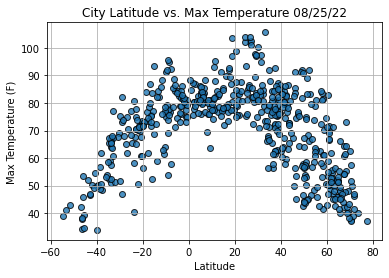

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

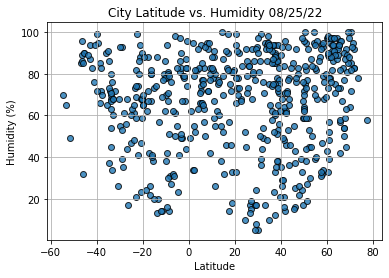

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

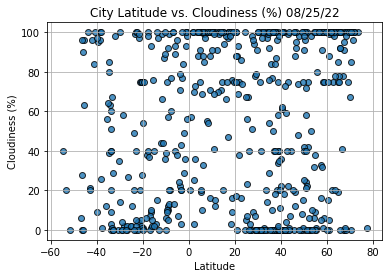

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

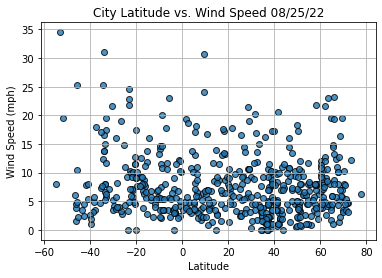

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"r = {r_value:.3f}")

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

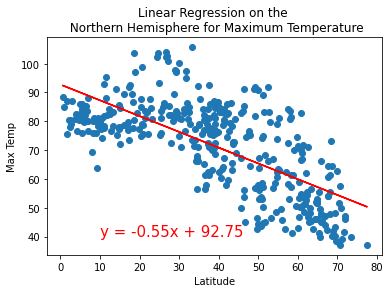

r = -0.691


In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))

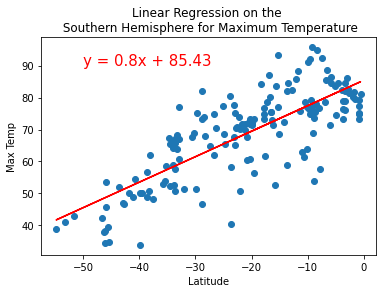

r = 0.783


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

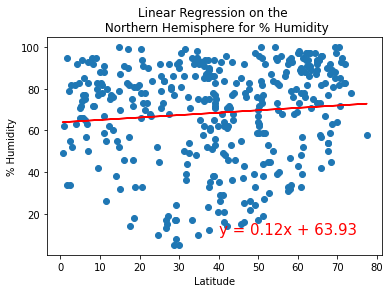

r = 0.096


In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

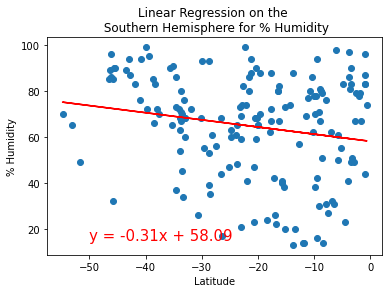

r = -0.190


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

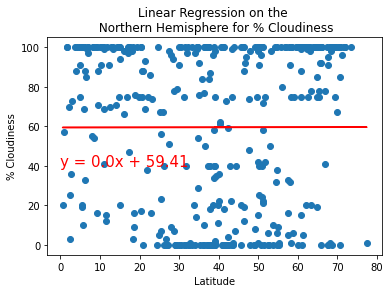

r = 0.001


In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(0,40))

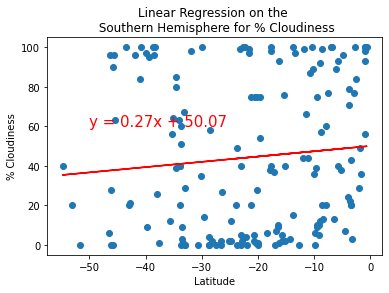

r = 0.096


In [64]:
# Linear regression on the Southren Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

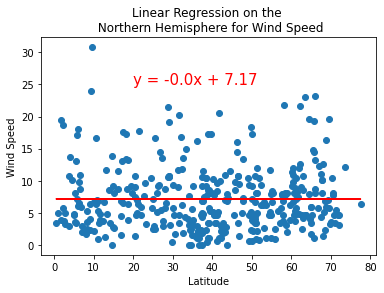

r = -0.002


In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(20,25))

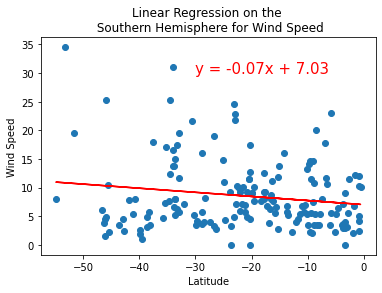

r = -0.160


In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \n Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-30,30))